<a href="https://colab.research.google.com/github/kamzon/Classification-of-database-nih-chest-xrays-Pneumo-/blob/main/Projet_DeepLearning_classification_de_la_base_de_donn%C3%A9e_NIH_Chest_X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification de la base doonées chest-xray-pneumonia**
 
#	**Introduction:**
  Le projet consiste à diagnostiquer la pneumonie à partir d'images XRay des 
poumons d'une personne à l'aide d'un réseau neuronal convolutif auto-posé. Les images étaient de taille supérieure à 1000 pixels par dimension et l'ensemble de données total était étiqueté grand et avait un espace de 1,2 Go. notre travail comprend un réseau de neurones auto-étendu qui a été réglé à plusieurs reprises pour l'un des meilleurs hyperparamètres et utilisé une variété de fonctions d'utilité de Keras comme les rappels pour la réduction du taux d'apprentissage et les points de contrôle.
  Nous allons d'abord parcourir l'ensemble de données de formation. Nous allons faire une analyse à ce sujet, examiner certains des échantillons, vérifier le nombre d'échantillons pour chaque classe, etc.

  Nous avons trois répertoires ( train , test, validation) et chaques 
répertoires
contient deux sous-répertoires ci dessous :

*   NORMAL: Ce sont les échantillons qui décrivent le cas normal (pas de pneumonie).
*   PNEUMONIE: Ce répertoire contient les échantillons qui sont les cas de pneumonie.


# **Le objectif de ce projet est** :
la réalisation d’un modèle CNN pour la classification de la base de données chest-xray-pneumonia avec le framework Keras et représentation de loss et accuracy sous forme des diagrammes.



#**les outils utulisés** :
## Model CNN
  Un CNN est simplement un empilement de plusieurs couches de convolution,
      pooling, correction ReLU et fully-connected. Chaque image reçue en entrée
      va donc être filtrée, réduite et corrigée plusieurs fois, pour finalement
      former un vecteur. Dans le problème de classification, ce vecteur 
      contient les probabilités d'appartenance aux classes.
      Tous les réseaux de neurones convolutifs doivent commencer par une couche
      de convolution et finir par une couche fully-connected. Les couches     
      intermédiaires peuvent s'empiler de différentes manières,à condition que
      la sortie d'une couche ait la même structure que l'entréede la suivante. 
      Par exemple, une couche fully-connected, qui renvoie toujours un vecteur,
      ne peut pas être placée avant une couche de pooling, puisque cette 
      dernière doit recevoir une matrice 3D.
    
## Tansorflow
Les API de haut niveau de TensorFlow sont basées sur la norme API Keras
      pour définir et former des réseaux de neurones. Keras permet un
      prototypage rapide, une recherche et une production de pointe, le tout
      avec des API conviviales.
  
## Keras
Keras est une bibliothèque de réseaux neuronaux de haut niveau qui
      s'exécute au sommet de TensorFlow, CNTK et Theano. 
      L'utilisation de Keras dans le deep learning permet un prototypage facile
      et rapide ainsi qu'une exécution transparente sur CPU et GPU. Ce
      framework est écrit en code Python qui est facile à déboguer et permet
      une facilité d'extensibilité.




# **Réalisation**
Voici les étapes nécessaires que nous avons suivi pour classifier la base de données chest-xray-pneumonia à base d’un modèle CNN:

## 1. Téléchargement de la base de donnée a partir de kaggle:





In [ ]:

!pip install -q kaggle
import os
os.environ['KAGGLE_USERNAME']="kamzon"
os.environ['KAGGLE_KEY']="4e8880ecf65acf484dfd34df7d74b4a5"
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:44<00:00, 52.2MB/s]
100% 2.29G/2.29G [00:44<00:00, 55.5MB/s]


## 2. extraction de la base donnée:

In [ ]:
!unzip chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0010-0001.jpeg  
  inflating: chest_x

# 3. importation des bibliothèques pour le praitraittement de la base de donnée:

In [ ]:
!pip3 install -q pydicom
!pip3 install -q tqdm
!pip3 install -q imgaug

import os
import sys
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import pydicom
from imgaug import augmenters 


import numpy as np
from matplotlib import pyplot as plt

import pandas as pd
import cv2 as cv 

from numpy import * 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
from skimage import io
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split

from PIL import Image
import scipy.io as sio
#from skimage.transfrorm import rescale
from skimage import color
from skimage.exposure import *

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report



     |████████████████████████████████| 35.1MB 90kB/s 


## 4. Définir un echatillant pour l'entrainement du model apartir de la base de données (x_train,Y_train):

In [ ]:
import PIL
from PIL import Image
#from resizeimage import resizeimage


def readImage(im_path):
  img =io.imread(im_path)
  #img= color.rgb2gray(img)
  #img=rescale_intensity(img, out_range=(0,255))
  return img


def loadDatatrain():
  x_tr=[]
  y_tr=[]
  #x_te=[]
  #y_te=[]

  classes=["NORMAL/","PNEUMONIA/"]
  for i in range(0,2):
    #print(i)
    classe=zeros(2)
    classe[i]=1

    pathClasse="chest_xray/train/"+classes[i]


    x=[]
    y=[]


    for f in os.listdir(pathClasse):
      if f[len(f)-4 : len(f)]=="jpeg":
        #print(f)
        img=cv.imread(pathClasse+"/"+f)
        #print(img.shape)
        img = skimage.transform.resize(img, (200, 200, 3))
        #img.save(pathClasse+"/"+f)
        #print(img.shape)
        #input()
        #plt.imshow(img)
        #print(classe)
        #input()
        img = np.asarray(img)
        x.append(img)
        y.append(classe)
      #print(".")

    print(np.asarray(x).shape)
    print(np.asarray(y).shape)
    
    #xtr,ytr,xte,yte=train_test_split(x,y,test_size=0.5, random_state=42)

    x_tr.extend(x)
    y_tr.extend(y)
    #x_te.extend(xte)
    #y_te.extend(yte)
  
  return asarray(x_tr),asarray(y_tr)

x_tr,y_tr=loadDatatrain()

(1341, 200, 200, 3)
(1341, 2)


KeyboardInterrupt: ignored

## 5. Défenir un echatillant pour la validation du medel apartir de la base de données(X_validation, Y_validation):

In [ ]:
def loadDatavalidation():
  x_val=[]
  y_val=[]


  classes=["NORMAL/","PNEUMONIA/"]
  for i in range(0,2):
    #print(i)
    classe=zeros(2)
    classe[i]=1

    pathClasse="chest_xray/val/"+classes[i]


    x=[]
    y=[]


    for f in os.listdir(pathClasse):
      if f[len(f)-4 : len(f)]=="jpeg":
        #print(f)
        img=cv.imread(pathClasse+"/"+f)
        #print(img.shape)
        img = skimage.transform.resize(img, (200, 200, 3))
        #img.save(pathClasse+"/"+f)
        #print(img.shape)
        #input()
        #plt.imshow(img)
        #print(classe)
        #input()
        img = np.asarray(img)
        x.append(img)
        y.append(classe)
      #print(".")

    print(np.asarray(x).shape)
    print(np.asarray(y).shape)
    
    #xtr,ytr,xte,yte=train_test_split(x,y,test_size=0.5, random_state=42)

    x_val.extend(x)
    y_val.extend(y)
    #x_te.extend(xte)
    #y_te.extend(yte)
  
  return asarray(x_val),asarray(y_val)

x_val,y_val=loadDatavalidation()

## 6. Défenir un echatillant pour tester medel apartir de la base de données (X_test, Y_test):

In [ ]:

def loadDatatest():
  x_te=[]
  y_te=[]

  classes=["NORMAL/","PNEUMONIA/"]
  for i in range(0,2):
    #print(i)
    classe=zeros(2)
    classe[i]=1

    pathClasse="chest_xray/test/"+classes[i]


    x=[]
    y=[]


    for f in os.listdir(pathClasse):
      if f[len(f)-4 : len(f)]=="jpeg":
        #print(f)
        img=cv.imread(pathClasse+"/"+f)
        #print(img.shape)
        img = skimage.transform.resize(img, (200, 200, 3))
        #img.save(pathClasse+"/"+f)
        #print(img.shape)
        #input()
        #plt.imshow(img)
        #print(classe)
        #input()
        img = np.asarray(img)
        x.append(img)
        y.append(classe)
      #print(".")

    print(np.asarray(x).shape)
    print(np.asarray(y).shape)
    
    #xtr,ytr,xte,yte=train_test_split(x,y,test_size=0.5, random_state=42)

    x_te.extend(x)
    y_te.extend(y)
    #x_te.extend(xte)
    #y_te.extend(yte)
  
  return asarray(x_te),asarray(y_te)

x_te,y_te=loadDatatest()

## 7. Analyse de la base de donnée:

In [ ]:
print("shape of X_train: ",x_tr.shape)
print("shape of Y_train: ",y_tr.shape)
print("shape of X_validation: ",x_val.shape)
print("shape of Y_validation: ",y_val.shape)
print("shape of X_test: ",x_te.shape)
print("shape of Y_test: ",y_te.shape)

shape of X_train:  (5216, 200, 200, 3)
shape of Y_train:  (5216, 2)
shape of X_validation:  (16, 200, 200, 3)
shape of Y_validation:  (16, 2)
shape of X_test:  (624, 200, 200, 3)
shape of Y_test:  (624, 2)


classes pneumo:
[0. 1.]


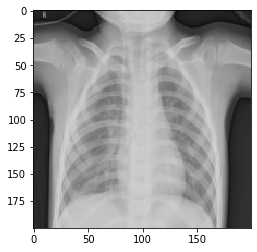

In [ ]:
#data base presentation
TRAIN_DIR = "../input/chest_xray/chest_xray/train/"
TEST_DIR =  "../input/chest_xray/chest_xray/test/"

Pimages = os.listdir(TRAIN_DIR + "PNEUMONIA")
Nimages = os.listdir(TRAIN_DIR + "NORMAL")
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"PNEUMONIA/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"NORMAL/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)


[0. 1.]


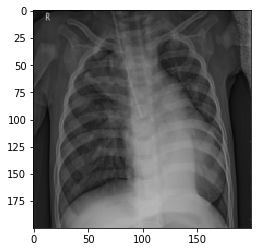

In [ ]:
plt.imshow(x_tr[2000])
print(y_tr[2000])

[0. 1.]


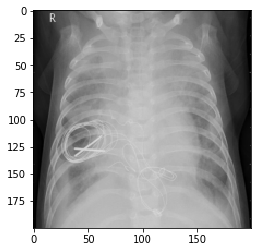

In [ ]:
plt.imshow(x_tr[3000])
print(y_tr[3000])

[0. 1.]


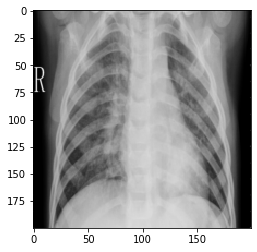

In [ ]:
plt.imshow(x_tr[4000])
print(y_tr[4000])

[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]


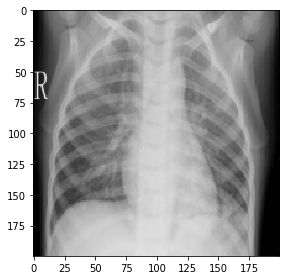

In [ ]:
#Classes normal:



for i in range(10):
  plt.imshow(x_val[i])
  print(y_tr[i])
  plt.tight_layout()



[1. 0.]


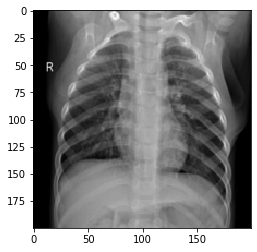

In [ ]:
plt.imshow(x_tr[300])
print(y_tr[300])

[1. 0.]


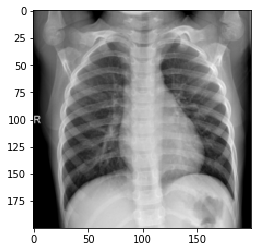

In [ ]:
plt.imshow(x_tr[1000])
print(y_tr[1000])

La dernière étape du prétraitement des données en entrée consiste à convertir notre type de données en float32 et à normaliser nos valeurs de données dans la plage [0, 1].

In [ ]:
#normalisation des valeurs 
x_train=x_tr
x_validation=x_val
x_test=x_te
x_train=x_train.astype('float32')
x_validation=x_validation.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255
x_validation /= 255
x_test /=255

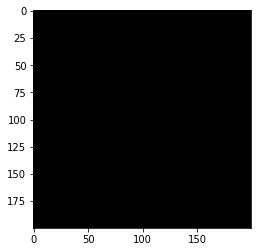

In [ ]:
plt.imshow(x_train[100])

## 8. Definition des models:

###    Archetecture du model:

Nous sommes maintenant prêts à définir notre architecture modèle. 


In [ ]:
# impoortation des bibliotheque

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU
from keras.layers import Convolution2D as Conv2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

# definition du model 1 sequential activationn= relu  

model = Sequential()
model.add(Conv2D(256, (3, 3), activation='relu', padding="same", input_shape=(200,200,3)))
#model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
#model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
#model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
#model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2 , activation='softmax'))


# **Voici le diagramme de premiere model**

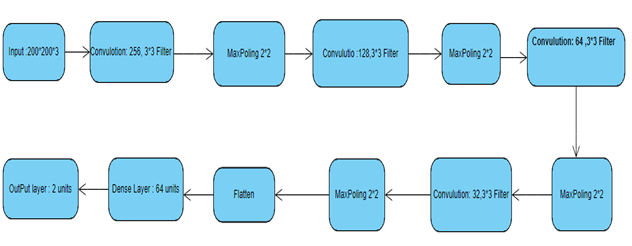

In [ ]:
# definition du model 2 sequential activation=linear + LeakyRelu

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(200,200,3)))
#model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.4))

model2.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.4))

model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
#model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.4))

model2.add(Conv2D(256, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
#model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.4))


model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
#model.add(Dropout(0.4))
model2.add(Dense(2 , activation='softmax'))

# **et ce diagramme pour le deuxieme model**

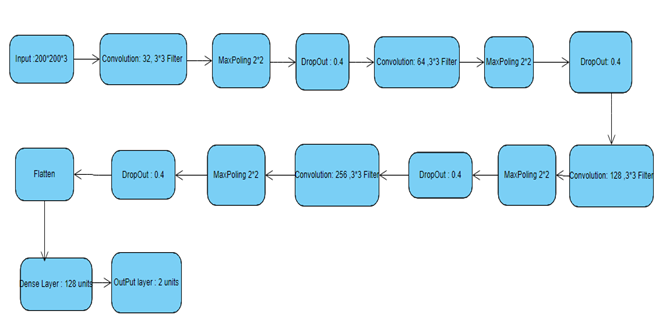

In [ ]:
# 5- compiler le model 1
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 200, 200, 256)     7168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 100, 100, 256)     0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 100, 100, 128)     295040    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 50, 50, 64)        73792     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 25, 32)       

In [ ]:
# compiler le model 2
model2.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 50, 50, 128)     

## resultat du prmier model activation= Relu

In [ ]:
# 6- adapter le modele 1

history=model.fit(x_tr,y_tr,validation_data = (x_te , y_te), batch_size=32,nb_epoch=50,verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5216 samples, validate on 624 samples
Epoch 1/50
5216/5216 [==============================] - 35s 7ms/step - loss: 0.3293 - acc: 0.8514 - val_loss: 0.7762 - val_acc: 0.7292
Epoch 2/50
5216/5216 [==============================] - 34s 7ms/step - loss: 0.1628 - acc: 0.9377 - val_loss: 0.6384 - val_acc: 0.7981
Epoch 3/50
5216/5216 [==============================] - 34s 6ms/step - loss: 0.1255 - acc: 0.9559 - val_loss: 0.9389 - val_acc: 0.7500
Epoch 4/50
5216/5216 [==============================] - 34s 6ms/step - loss: 0.1099 - acc: 0.9615 - val_loss: 1.1003 - val_acc: 0.7356
Epoch 5/50
5216/5216 [==============================] - 34s 7ms/step - loss: 0.0886 - acc: 0.9695 - val_loss: 1.2970 - val_acc: 0.7131
Epoch 6/50
5216/5216 [==============================] - 34s 6ms/step - loss: 0.0861 - acc: 0.9695 - val_loss: 1.1867 - val_acc: 0.7692
Epoch 7/50
5216/5216 [==============================] - 34s 6ms/step - loss: 0.0720 - acc: 0.9774 - val_loss: 1.5412 - val_acc: 0.7740
Epoch 8/

maintenat on va essayer de faire un logigramme de accuracy et de loss

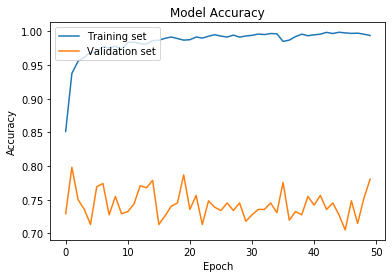

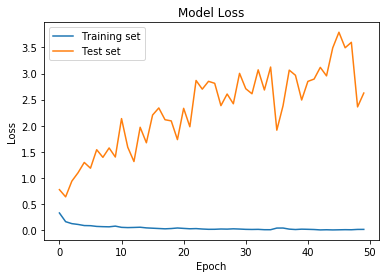

In [ ]:
#final model result:
# Accuracy 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

# Loss 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()


In [ ]:
# 7- adapter le modele  

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 2s 3ms/step
[2.625727579571284, 0.780448717948718]


## resultat du deuxieme model activation=linear + LeakyRelu

In [ ]:
# 6- adapter le modele 1

history2=model2.fit(x_tr,y_tr,validation_data = (x_val , y_val), batch_size=32,nb_epoch=20,verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5216 samples, validate on 16 samples
Epoch 1/20
5216/5216 [==============================] - 11s 2ms/step - loss: 4.1332 - acc: 0.7402 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/20
5216/5216 [==============================] - 9s 2ms/step - loss: 4.1439 - acc: 0.7429 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/20
1984/5216 [==========>...................] - ETA: 5s - loss: 4.2326 - acc: 0.7374

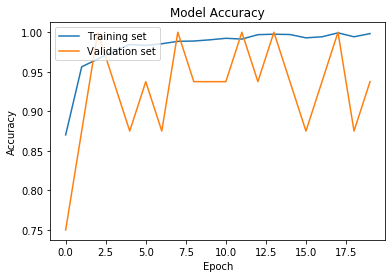

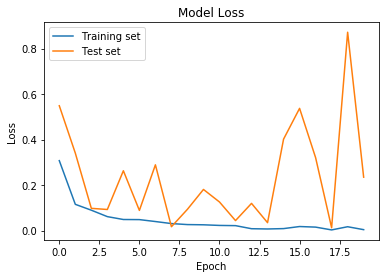

In [ ]:
#final model result:
# Accuracy 
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

# Loss 

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [ ]:
# 7- adapter le modele 2

score= model2.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 951us/step
[2.7427667176750865, 0.7612179487179487]


In [ ]:
# 7- adapter le modele   SCooor 1

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 2ms/step
[6.0442858445338805, 0.625]


In [ ]:
# 7- adapter le modele   SCooor 2

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 1ms/step
[3.3073744320064384, 0.7323717948717948]


In [ ]:
# 7- adapter le modele   SCooor 3

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 1ms/step
[2.2825366739124076, 0.7580128205128205]


In [ ]:
# 7- adapter le modele   SCooor 4

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 2ms/step
[2.3300854135885345, 0.7788461538461539]


In [ ]:
# 7- adapter le modele   SCooor 5

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 2s 3ms/step
[2.2863394911062302, 0.7644230769230769]


In [ ]:
# 7- adapter le modele   SCooor 6

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 2s 3ms/step
[2.331289469437636, 0.7564102564102564]


In [ ]:
# 7- adapter le modele   SCooor 7

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 2s 3ms/step
[1.358070087948596, 0.7724358974358975]


In [ ]:
# 7- adapter le modele   SCooor 8

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 2ms/step
[6.0442858445338805, 0.625]


In [ ]:
# 7- adapter le modele   SCooor 9

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 2ms/step
[2.9292048879736696, 0.7387820512820513]


In [ ]:
# 7- adapter le modele   SCooor 10

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 1ms/step
[3.2646783241361312, 0.7019230769230769]


In [ ]:
# 7- adapter le modele   SCooor 11   dropout in foully connected

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 1ms/step
[2.634487386582197, 0.7580128205128205]


In [ ]:
# 7- adapter le modele   SCooor 12  sans dropout

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 2ms/step
[1.8066146911977556, 0.7996794871794872]


In [ ]:
# 7- adapter le modele   SCooor 13  dropout in conv

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 2ms/step
[6.0442858445338805, 0.625]


In [ ]:
# 7- adapter le modele   SCooor 13  dropout in conv

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 1s 2ms/step
[1.7608265091338353, 0.7724358974358975]


In [ ]:
# new model drop out in feature extraction ***********************************************

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 0s 372us/step
[2.7417227765306578, 0.7532051282051282]


In [ ]:
# new model data augmentation

score= model.evaluate(x_test2,y_test2,verbose=1)
print(score)

1248/1248 [==============================] - 1s 628us/step
[2.3106003252897405, 0.7900641025641025]


In [ ]:
# new model2 data augmentation

score= model.evaluate(x_test2,y_test2,verbose=1)
print(score)

1248/1248 [==============================] - 0s 390us/step
[3.2023325274466585, 0.780448717948718]


In [ ]:
# new model1 data augmentation withou dropout

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 0s 561us/step
[1.0939931980855107, 0.7660256410256411]


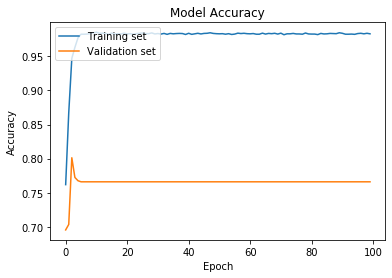

In [ ]:
# Accuracy SCooor 13  filtre 3*3 batchnormalisation
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

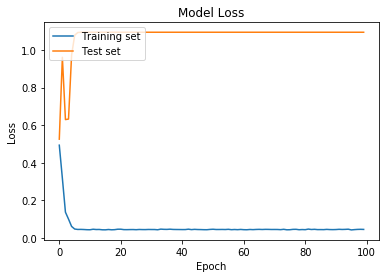

In [ ]:
# Loss SCooor 13  filtre 3*3 batchnormalisation

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [ ]:
# new model1 RGB images

score= model.evaluate(x_te,y_te,verbose=1)
print(score)

624/624 [==============================] - 0s 534us/step
[0.836580199141724, 0.7852564102564102]


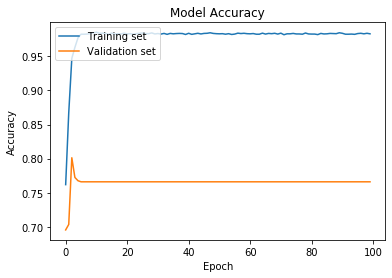

In [ ]:
# Accuracy SCooor 13  filtre 3*3 batchnormalisation
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

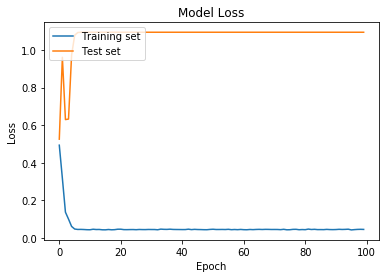

In [ ]:
# Loss SCooor 13  filtre 3*3 batchnormalisation

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()